<a href="https://colab.research.google.com/github/shashithenuwara/FDM-MINI_project/blob/main/Ensemble_L.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Data Cleaning**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

**Load the dataset**

In [ ]:
data = pd.read_csv('Sleep_Data_Sampled.csv')

**Drop Co-relevant columns**

In [ ]:
drop_cols = ['Person ID', 'Sleep Duration', 'Physical Activity Level', 'Daily Steps']

In [ ]:
data_cleaned = data.drop(columns=drop_cols)

In [ ]:
data_cleaned.head()

,Gender,Age,Occupation,Quality of Sleep,Stress Level,BMI Category,Blood Pressure,Heart Rate,Fatigue Score,Sleep Disorder
0,Male,35,Doctor,7,7,Under Weight,120/80,71,7.52,Healthy
1,Male,42,Teacher,8,4,Normal,135/90,66,7.54,Healthy
2,Male,34,Software Engineer,7,6,Overweight,126/83,74,9.50,Healthy
3,Male,32,Doctor,6,7,Normal,120/80,71,7.54,Healthy
4,Male,37,Lawyer,7,6,Normal,125/80,71,8.76,Healthy


**Handle Noisy Data**

In [ ]:
data_cleaned = data_cleaned.dropna() #Drop Rows with null Values

In [ ]:
# Calculate the mean of valid (non-negative) Fatigue Score values
mean_fatigue_score = data_cleaned[data_cleaned['Fatigue Score'] >= 0]['Fatigue Score'].mean()

# Replace negative values in Fatigue Score with the mean value
data_cleaned['Fatigue Score'] = data_cleaned['Fatigue Score'].apply(lambda x: mean_fatigue_score if x < 0 else x)

**Encode Categorical Variables**

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data_cleaned['Encoded_Column_Gender'] = label_encoder.fit_transform(data_cleaned['Gender'])
data_cleaned['Encoded_Column_Occupation'] = label_encoder.fit_transform(data_cleaned['Occupation'])
data_cleaned['Encoded_Column_BMI Category'] = label_encoder.fit_transform(data_cleaned['BMI Category'])


In [ ]:
data_cleaned = pd.get_dummies(data_cleaned, columns=['Gender'],)
data_cleaned = pd.get_dummies(data_cleaned, columns=['Occupation'])
data_cleaned = pd.get_dummies(data_cleaned, columns=['BMI Category'])

**Handle Other Non-Numerical Values**

In [ ]:
def convert_blood_pressure(bp):
    try:

        systolic, diastolic = map(int, bp.split('/'))
        return (systolic + diastolic) / 2
    except:
        return None

In [ ]:
data_cleaned ['Blood Pressure'] = data_cleaned ['Blood Pressure'].apply(convert_blood_pressure)

In [ ]:
data_cleaned.head()

,Age,Quality of Sleep,Stress Level,Blood Pressure,Heart Rate,Fatigue Score,Sleep Disorder,Encoded_Column_Gender,Encoded_Column_Occupation,Encoded_Column_BMI Category,...,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal,BMI Category_Obese,BMI Category_Overweight,BMI Category_Under Weight
0,35,7,7,100.0,71,7.52,Healthy,1,1,3,...,False,False,False,False,False,False,False,False,False,True
1,42,8,4,112.5,66,7.54,Healthy,1,10,0,...,False,False,False,False,False,True,True,False,False,False
2,34,7,6,104.5,74,9.50,Healthy,1,9,2,...,False,False,False,False,True,False,False,False,True,False
3,32,6,7,100.0,71,7.54,Healthy,1,1,0,...,False,False,False,False,False,False,True,False,False,False
4,37,7,6,102.5,71,8.76,Healthy,1,3,0,...,False,False,False,False,False,False,True,False,False,False


**2. Data Transformation**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [ ]:
numeric_columns = ['Quality of Sleep', 'Blood Pressure','Stress Level', 'Heart Rate', 'Fatigue Score']

**Scale Numeric values from 0 to 10**

In [ ]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 10))

# Apply the scaler to the numeric columns

data_cleaned[numeric_columns] = scaler.fit_transform(data_cleaned[numeric_columns])

data_cleaned[numeric_columns] = data_cleaned[numeric_columns].round(2)

In [ ]:
data_cleaned.head()

,Age,Quality of Sleep,Stress Level,Blood Pressure,Heart Rate,Fatigue Score,Sleep Disorder,Encoded_Column_Gender,Encoded_Column_Occupation,Encoded_Column_BMI Category,...,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal,BMI Category_Obese,BMI Category_Overweight,BMI Category_Under Weight
0,35,6.0,8.0,2.22,2.86,3.40,Healthy,1,1,3,...,False,False,False,False,False,False,False,False,False,True
1,42,8.0,2.0,7.78,0.48,3.42,Healthy,1,10,0,...,False,False,False,False,False,True,True,False,False,False
2,34,6.0,6.0,4.22,4.29,5.09,Healthy,1,9,2,...,False,False,False,False,True,False,False,False,True,False
3,32,4.0,8.0,2.22,2.86,3.42,Healthy,1,1,0,...,False,False,False,False,False,False,True,False,False,False
4,37,6.0,6.0,3.33,2.86,4.46,Healthy,1,3,0,...,False,False,False,False,False,False,True,False,False,False


**3. Data Mining**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

**Define features and Target Variable**

In [ ]:
X = data_cleaned.drop(columns=['Sleep Disorder'])
y = data_cleaned['Sleep Disorder']

**Define Base Models**

In [ ]:
estimators = [
    ('rf', RandomForestClassifier()),
    ('knn', KNeighborsClassifier()),
    ('lr', LogisticRegression())
]

**Define Stacking Model with Final Estimator**

In [ ]:
stacking_model = StackingClassifier(
    estimators=estimators,
    final_estimator=SVC()
)

**Cross Validation**

In [ ]:
kfold = StratifiedKFold(n_splits=10)
scores = cross_val_score(stacking_model, X, y, cv=kfold, scoring='accuracy')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

**Training**

In [ ]:
stacking_model.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

StackingClassifier(estimators=[('rf', RandomForestClassifier()),
                               ('knn', KNeighborsClassifier()),
                               ('lr', LogisticRegression())],
                   final_estimator=SVC())

**Get the average accuracy score across folds**

In [ ]:
print("Accuracy:", scores.mean())

Accuracy: 0.9612857142857141


**4. Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
trained_columns = X_train.columns
trained_columns

Index(['Age', 'Quality of Sleep', 'Stress Level', 'Blood Pressure',
       'Heart Rate', 'Fatigue Score', 'Encoded_Column_Gender',
       'Encoded_Column_Occupation', 'Encoded_Column_BMI Category',
       'Gender_Female', 'Gender_Male', 'Occupation_Accountant',
       'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Lawyer',
       'Occupation_Manager', 'Occupation_Nurse',
       'Occupation_Sales Representative', 'Occupation_Salesperson',
       'Occupation_Scientist', 'Occupation_Software Engineer',
       'Occupation_Teacher', 'BMI Category_Normal', 'BMI Category_Obese',
       'BMI Category_Overweight', 'BMI Category_Under Weight'],
      dtype='object')

In [ ]:
stacking_model.fit(X_train, y_train)
y_pred = stacking_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

**Accuracy and F1-Score**

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.9560714285714286
F1 Score: 0.9560690384727617


**Classification Report**

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Healthy       0.96      0.95      0.95       955
    Insomnia       0.95      0.96      0.95       914
 Sleep Apnea       0.96      0.96      0.96       931

    accuracy                           0.96      2800
   macro avg       0.96      0.96      0.96      2800
weighted avg       0.96      0.96      0.96      2800



**Confusion Matrix**

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[907  23  25]
 [ 27 875  12]
 [ 14  22 895]]


**5. Visualization**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

**Confusion Matrix visualization**

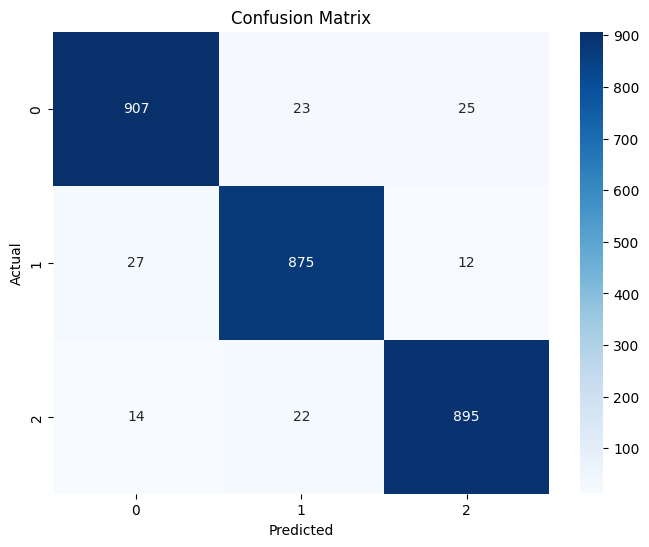

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Feature Importance**

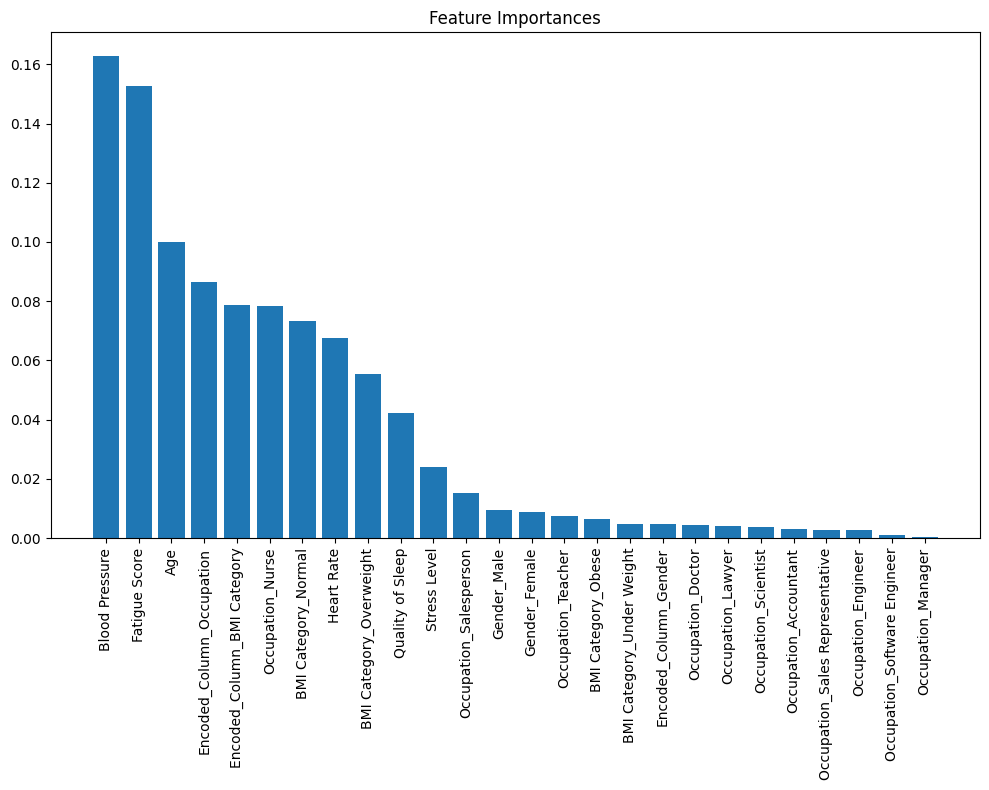

In [ ]:
importances = stacking_model.named_estimators_['rf'].feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 8))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

**6. User Interface**

In [ ]:

import joblib
joblib.dump(stacking_model, 'sleep_data_model.pkl')

['sleep_data_model.pkl']

In [ ]:

trained_columns = X.columns


joblib.dump(trained_columns, 'trained_columns.pkl')

['trained_columns.pkl']

In [ ]:

!pip install streamlit
!pip install pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 73.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 96.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.9 MB/s eta 0:00:00


In [ ]:
!ngrok authtoken 2mhmVgSRpnqiFyZL3WoY4j0EA7H_6MuP3KYnr2QCVN3f2tYZ

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
%%writefile app2.py
import streamlit as st
import pandas as pd
import numpy as np
import joblib

# Load the trained model and columns
model = joblib.load('sleep_data_model.pkl')
trained_columns = joblib.load('trained_columns.pkl')

# Function to capture user input
def user_input_features():
    age = st.sidebar.slider('Age', 18, 100, 25)
    gender = st.sidebar.selectbox('Gender', ['Male', 'Female'])
    occupation = st.sidebar.selectbox('Occupation', ['Sales Representative', 'Scientist', 'Software Engineer',
                                                      'Lawyer', 'Salesperson', 'Teacher',
                                                      'Manager', 'Accountant', 'Engineer',
                                                      'Doctor', 'Nurse'])
    bmi_category = st.sidebar.selectbox('BMI Category', ['Underweight', 'Normal', 'Overweight', 'Obese'])
    blood_pressure = st.sidebar.slider('Blood Pressure (average of systolic and diastolic)', 80.0, 180.0, 120.0)
    stress_level = st.sidebar.slider('Stress Level', 0, 10, 5)
    heart_rate = st.sidebar.slider('Heart Rate', 50, 120, 70)
    fatigue_score = st.sidebar.slider('Fatigue Score', 0, 10, 5)
    quality_of_sleep = st.sidebar.slider('Quality of Sleep', 0, 10, 5)

    # Convert categorical inputs to match the format used in training
    gender = 0 if gender == 'Male' else 1
    occupation_encoded = {'Sales Representative': 0, 'Scientist': 1, 'Software Engineer': 2,
                          'Lawyer': 3, 'Salesperson': 4, 'Teacher': 5,
                          'Manager': 6, 'Accountant': 7, 'Engineer': 8,
                          'Doctor': 9, 'Nurse': 10}[occupation]
    bmi_category_encoded = {'Underweight': 0, 'Normal': 1, 'Overweight': 2, 'Obese': 3}[bmi_category]

    # Create a DataFrame for the input data
    data = {
        'Age': age,
        'Blood Pressure': blood_pressure,
        'Stress Level': stress_level,
        'Heart Rate': heart_rate,
        'Fatigue Score': fatigue_score,
        'Quality of Sleep': quality_of_sleep,
        'Encoded_Column_Gender': gender,
        'Encoded_Column_Occupation': occupation_encoded,
        'Encoded_Column_BMI Category': bmi_category_encoded
    }

    features = pd.DataFrame(data, index=[0])

    # Add missing columns to match trained model's input
    missing_cols = set(trained_columns) - set(features.columns)
    for col in missing_cols:
        features[col] = 0

    # Ensure columns are in the same order as during training
    features = features[trained_columns]

    return features

#st.write("# Sleep Disorder Prediction")
st.write('<p style="color:blue;">Sleep Disorder Prediction</p>', unsafe_allow_html=True)
st.write("""
This app predicts whether a person is 'Healthy', has 'Sleep Apnea', or 'Insomnia'
based on various features such as Blood Pressure, Quality of Sleep, and more.
""")

# Capture input features
input_df = user_input_features()

# Add a Predict button
if st.button('Predict'):
    prediction = model.predict(input_df)

    # Debugging: Print the raw prediction value
    st.write(f'Prediction : {prediction}')

    # Mapping the numeric predictions to human-readable labels
    labels = {0: 'Healthy', 1: 'Sleep Apnea', 2: 'Insomnia'}

Writing app2.py


In [ ]:
#Importing ngrok and run the app
from pyngrok import ngrok

#Run the Streamlit app in the background
!streamlit run app2.py &>/dev/null&

#Expose the app using ngrok
public_url = ngrok.connect(8501)
print(f'App is live at: {public_url}')

App is live at: NgrokTunnel: "https://d1d4-34-125-210-134.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
#Trying the model with hard-coded values
import joblib
import pandas as pd

# Load the model and columns
model = joblib.load('sleep_data_model.pkl')
trained_columns = joblib.load('trained_columns.pkl')

# Create a sample input DataFrame with values that you want to test
sample_data = {
    'Age': 52,
    'Blood Pressure': 103.05,
    'Stress Level': 9,
    'Heart Rate': 88,
    'Fatigue Score': 3,
    'Quality of Sleep': 3,
    'Encoded_Column_Gender': 1,
    'Encoded_Column_Occupation': 3,
    'Encoded_Column_BMI Category': 1
}

# Create a DataFrame
input_df = pd.DataFrame(sample_data, index=[0])

# Ensure all columns are present
missing_cols = set(trained_columns) - set(input_df.columns)
for col in missing_cols:
    input_df[col] = 0
input_df = input_df[trained_columns]

# Make prediction
prediction = model.predict(input_df)
print(f'Prediction for sample input: {prediction[0]}')


Prediction for sample input: Sleep Apnea


In [ ]:
# new ver

%%writefile app2.py
import streamlit as st
import pandas as pd
import numpy as np
import joblib

# Load the trained model and columns
model = joblib.load('sleep_data_model.pkl')
trained_columns = joblib.load('trained_columns.pkl')

# Function to capture user input
def user_input_features():
    age = st.sidebar.slider('Age', 18, 100, 25)
    gender = st.sidebar.selectbox('Gender', ['Male', 'Female'])
    occupation = st.sidebar.selectbox('Occupation', ['Sales Representative', 'Scientist', 'Software Engineer',
                                                      'Lawyer', 'Salesperson', 'Teacher',
                                                      'Manager', 'Accountant', 'Engineer',
                                                      'Doctor', 'Nurse'])
    bmi_category = st.sidebar.selectbox('BMI Category', ['Underweight', 'Normal', 'Overweight', 'Obese'])
    blood_pressure = st.sidebar.slider('Blood Pressure (average of systolic and diastolic)', 80.0, 180.0)
    stress_level = st.sidebar.slider('Stress Level', 0, 10)
    heart_rate = st.sidebar.slider('Heart Rate', 50, 120)
    fatigue_score = st.sidebar.slider('Fatigue Score', 0, 10)
    quality_of_sleep = st.sidebar.slider('Quality of Sleep', 0, )

    # Convert categorical inputs to match the format used in training
    gender = 0 if gender == 'Male' else 1
    occupation_encoded = {'Sales Representative': 0, 'Scientist': 1, 'Software Engineer': 2,
                          'Lawyer': 3, 'Salesperson': 4, 'Teacher': 5,
                          'Manager': 6, 'Accountant': 7, 'Engineer': 8,
                          'Doctor': 9, 'Nurse': 10}[occupation]
    bmi_category_encoded = {'Underweight': 0, 'Normal': 1, 'Overweight': 2, 'Obese': 3}[bmi_category]

    # Create a DataFrame for the input data
    data = {
        'Age': age,
        'Blood Pressure': blood_pressure,
        'Stress Level': stress_level,
        'Heart Rate': heart_rate,
        'Fatigue Score': fatigue_score,
        'Quality of Sleep': quality_of_sleep,
        'Encoded_Column_Gender': gender,
        'Encoded_Column_Occupation': occupation_encoded,
        'Encoded_Column_BMI Category': bmi_category_encoded
    }

    features = pd.DataFrame(data, index=[0])

    # Add missing columns to match trained model's input
    missing_cols = set(trained_columns) - set(features.columns)
    for col in missing_cols:
        features[col] = 0

    # Ensure columns are in the same order as during training
    features = features[trained_columns]

    return features

#st.write("# Sleep Disorder Prediction")
st.write('<p style="color:blue;">Sleep Disorder Prediction</p>', unsafe_allow_html=True)
st.write("""
This app predicts whether a person is 'Healthy', has 'Sleep Apnea', or 'Insomnia'
based on various features such as Blood Pressure, Quality of Sleep, and more.
""")

# Capture input features
input_df = user_input_features()

# Add a Predict button
if st.button('Predict'):
    prediction = model.predict(input_df)

    # Debugging: Print the raw prediction value
    st.write(f'Prediction : {prediction}')

    # Mapping the numeric predictions to human-readable labels
    labels = {0: 'Healthy', 1: 'Sleep Apnea', 2: 'Insomnia'}